<a href="https://colab.research.google.com/github/rhehgus02/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C(17)_%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **4. SVD(Singular Value Decomposition)**

### **4-1. SVD 개요**

* PCA와 유사한 행렬 분해 기법을 이용

    -> PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 행과 열의 크기가 다른 행렬에도 적용 가능

* SVD는 특이값 분해로 불림

    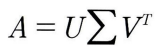,

    * 행렬 U와 V에 속한 벡터는 특이벡터이며, 모든 특이벡터는 서로 직교하는 성질을 가짐

    * 시그마는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0임

    * 시그마가 위치한 0이 아닌 값이 바로 행렬 A의 특이값임


* SVD는 A의 차원이 mxn일 때 U의 차원을 mxm, 시그마의 차원을 mxn, VT의 차원을 nxn으로 분해함

    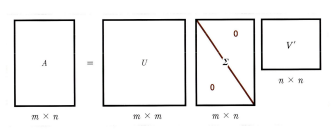

* 하지만 일반적으로 시그마의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 시그마에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용함

    -> A의 차원이 mxn일 때, U의 차원을 mxp, 시그마의 차원을 pxp, VT의 차원을 pxn으로 분해

    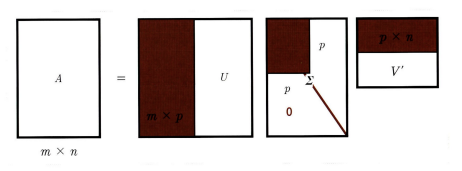

* Truncated SVD: 시그마의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것


In [1]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


>> 랜덤 행렬을 생성하는 이유는 행렬의 개별 로우끼리의 의존성을 없애기 위해서임

* SVD 분해는 `numpy.linalg.svd`에 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치 행렬을 반환함

* Sigma 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고 그렇지 않은 경우는 모두 0이므로 0이 아닌 값만 1차원 행렬로 표현

In [2]:
# a 행렬 분해하기
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


>> U 행렬이 4x4, Vt 행렬이 4x4로 반환됐고, Sigma의 경우는 1차원 행렬인 (4, )로 반환됨

In [3]:
# 세 행렬을 다시 내적해 원본 행렬로 복원되는지 확인
# Sigma는 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


>> 원본 행렬 a와 동일하게 복원됨

* 데이터 세트가 행 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보기

In [4]:
# 의존성을 부여하기 위해 a 행렬의 세번째, 네번째 행을 업데이트
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


>> 이전과 다르게 로우 간 관계가 매우 높아짐

In [5]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


>> 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함

>> 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미 (행렬의 Rank가 2)

* 이번에는 행렬의 전체 데이터를 이용하지 않고 Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원하기

* 즉, Sigma의 경우 앞의 2개 요소만 0이 아니므로 U 행렬 중 선행 두개의 열만 추출하고, Vt의 경우는 선행 두 개의 행만 추출해 복원

In [6]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


* Truncated SVD: Sigma 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식

    -> 이렇게 분해하면 인위적으로 더 작은 차원의 U, Sigma, Vt로 분해하기 때문에 원본 행렬을 정확하게 다시 원복하지 못 함

    -> 그러나 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있음

* 사이파이 모듈의 Truncated SVD: `scipy.sparse.linalg.svds`

In [7]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우, U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

>> 6x6 행렬을 SVD 분해하면 U, Sigma, Vt가 각각 (6,6) (6,) (6,6) 차원임

>> Truncated SVD의 n_components를 4로 설정해 U, Sigma, Vt를 (6,4) (4,) (4,6)로 각각 분해함

>> Truncated SVD로 분해된 행렬을 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있음

---

### **4-2. 사이킷런 TruncatedSVD 클래스를 이용한 변환**

* 사이킷런의 `TruncatedSVD` 클래스: 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지는 않음

    -> 대신 PCA 클래스와 유사하게 fit()과 transform()을 호출해 원본 데이터를 몇 개의 Truncated SVD의 K 컴포넌트 수로 차원을 축소해 변환함

    -> 원본 데이터를 Truncated SVd 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성함

Text(0, 0.5, 'TruncatedSVD Component 2')

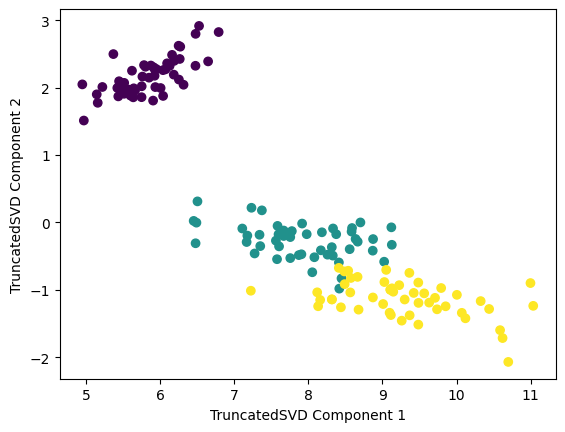

In [8]:
# 붓꽃 데이터 세트를 TruncatedSVD를 이용해 변환하기
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x = iris_tsvd[:, 0], y= iris_tsvd[:, 1], c = iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

>> PCA와 유사히게 변환 후에 품종 별로 어느정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있음

* 사이킷런의 TruncatedSVD와 PCA 클래스 구현을 자세히 보면 두 클래스 모두 SVD를 이용해 행렬을 분해함

* 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환해보기

Text(0.5, 1.0, 'PCA Transformed')

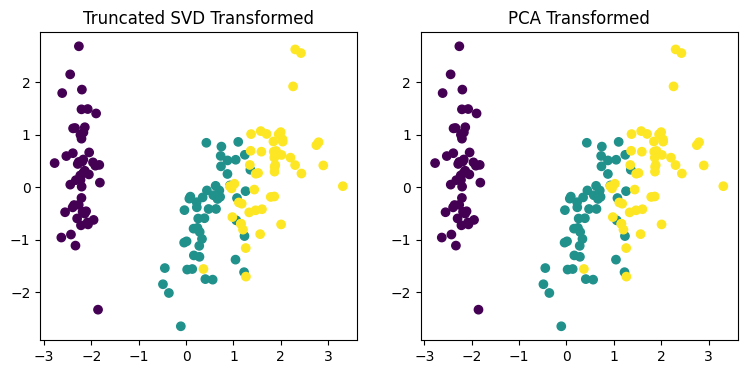

In [9]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x = iris_tsvd[:,0], y = iris_tsvd[:,1], c = iris.target)
ax2.scatter(x = iris_pca[:,0], y = iris_pca[:,1], c = iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

>> 두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율 값을 실제로 서로 비교해보면 거의 같음

In [10]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3364990497931616e-15
2.0816681711721685e-17


>> 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있음

>> 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행

>> 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미

>> 하지만 PCA는 밀집 행렬에 대한 변환만 가능하며 SVD는 희소 행렬에 대한 변환도 가능

>> 희소행렬(sparse matrix): 행렬의 값이 대부분 0인 경우를 가리키는 표현

---

## **5. NMF(Non-Negative Matrix Factorization)**

### **5-1. NMF의 개요**

* NMF: Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형

    -> 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법임

* 행렬 분해(Matrix Factorization): 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것

    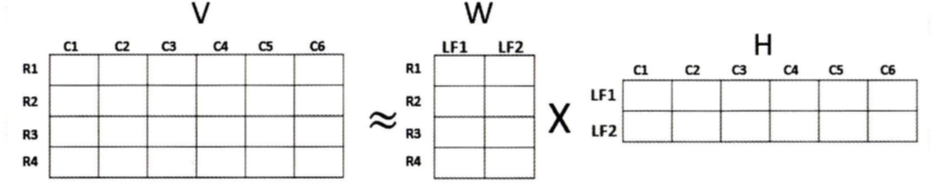

    -> 행렬 분해를 하게 되면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 W와 작고 넓은 H로 분해됨

    -> 이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 됨

    -> 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열(원본 속성)로 어떻게 구성됐는지를 나타내는 행렬임

* NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

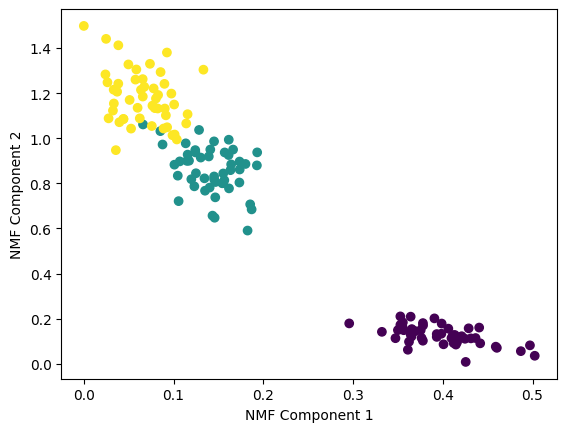

In [11]:
# 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 시각화
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x = iris_nmf[:,0], y = iris_nmf[:,1], c = iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')